In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2024-01-10 13:19:12.807563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the dataset using the 'ISO-8859-1' encoding
spotify_data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Set the style for seaborn plots
sns.set_style('whitegrid')

# Check for the missing values
missing_values = spotify_data.isnull().sum()

# Descriptive statistics
desc_stats = spotify_data.describe()

print('These are the number of missing values in each column:\n', missing_values)
print('These are the statistic values of each column:\n',desc_stats)

These are the number of missing values in each column:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
These are the statistic values of each column:
        artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116

In [4]:
# Check the datatype of the 'streams' column
streams_datatype = spotify_data['streams'].dtype

print('The data type of \'streams\' column is:', streams_datatype)

The data type of 'streams' column is: object


In [5]:
# Convert the 'streams' column to numeric type
spotify_data['streams'] =  pd.to_numeric(spotify_data['streams'], errors = 'coerce')

# Checking for any NaN values in the 'streams' column after conversion
nan_streams = spotify_data['streams'].isnull().sum()

print('There are', nan_streams, 'NaN data points in \'streams\' column')

There are 1 NaN data points in 'streams' column


In [6]:
# Extracting the row with the NaN value in the 'streams' column
nan_streams_row = spotify_data[spotify_data['streams'].isnull()]

nan_streams_row

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,110,A,Major,53,75,69,7,0,17,3


In [7]:
# Add a plot for the distribiution of 'streams'

In [8]:
# Clear any duplicate rows in the dataset
spotify_data = spotify_data.drop_duplicates()

#  Clear any the rows that have a NaN value in the 'streams' column
spotify_data = spotify_data.dropna(subset = ['streams'])

# Checking the shape of the dataframe after dropping the row
data_shape = spotify_data.shape

print('This is the data shape after dropping the NaN:', data_shape)

This is the data shape after dropping the NaN: (952, 24)


In [9]:
# Correlation with 'streams' column after dropping the NaN row
corr_w_streams = spotify_data.corr()['streams'].sort_values(ascending = False)

print('These are the correlations of the columns in the table with \'stream\' column:\n', corr_w_streams)

These are the correlations of the columns in the table with 'stream' column:
 streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
released_day            0.010598
bpm                    -0.002438
acousticness_%         -0.004485
released_month         -0.024938
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
released_year          -0.230803
Name: streams, dtype: float64


/var/folders/hd/350rl6f57c3g5gwpl3_84tn00000gn/T/ipykernel_10566/288435928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_w_streams = spotify_data.corr()['streams'].sort_values(ascending = False)


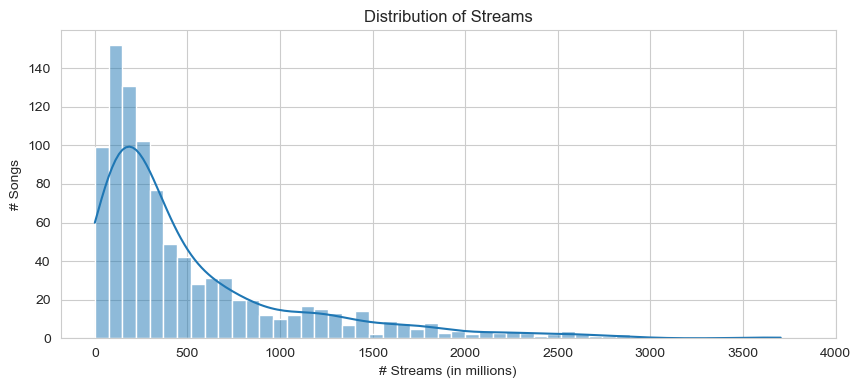

In [10]:
# Plotting the distribution of the 'streams' variable
plt.figure(figsize = (10, 4))
sns.histplot(spotify_data['streams'], bins = 50, kde = True)
tick_loc = [0, 0.5e9, 1.0e9, 1.5e9, 2.0e9, 2.5e9, 3.0e9, 3.5e9, 4.0e9]
tick_label = ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
plt.xticks(tick_loc, tick_label)
plt.title('Distribution of Streams')
plt.xlabel('# Streams (in millions)')
plt.ylabel('# Songs')
plt.show()

In [11]:
# List of all the features
features_list = list(spotify_data.columns)

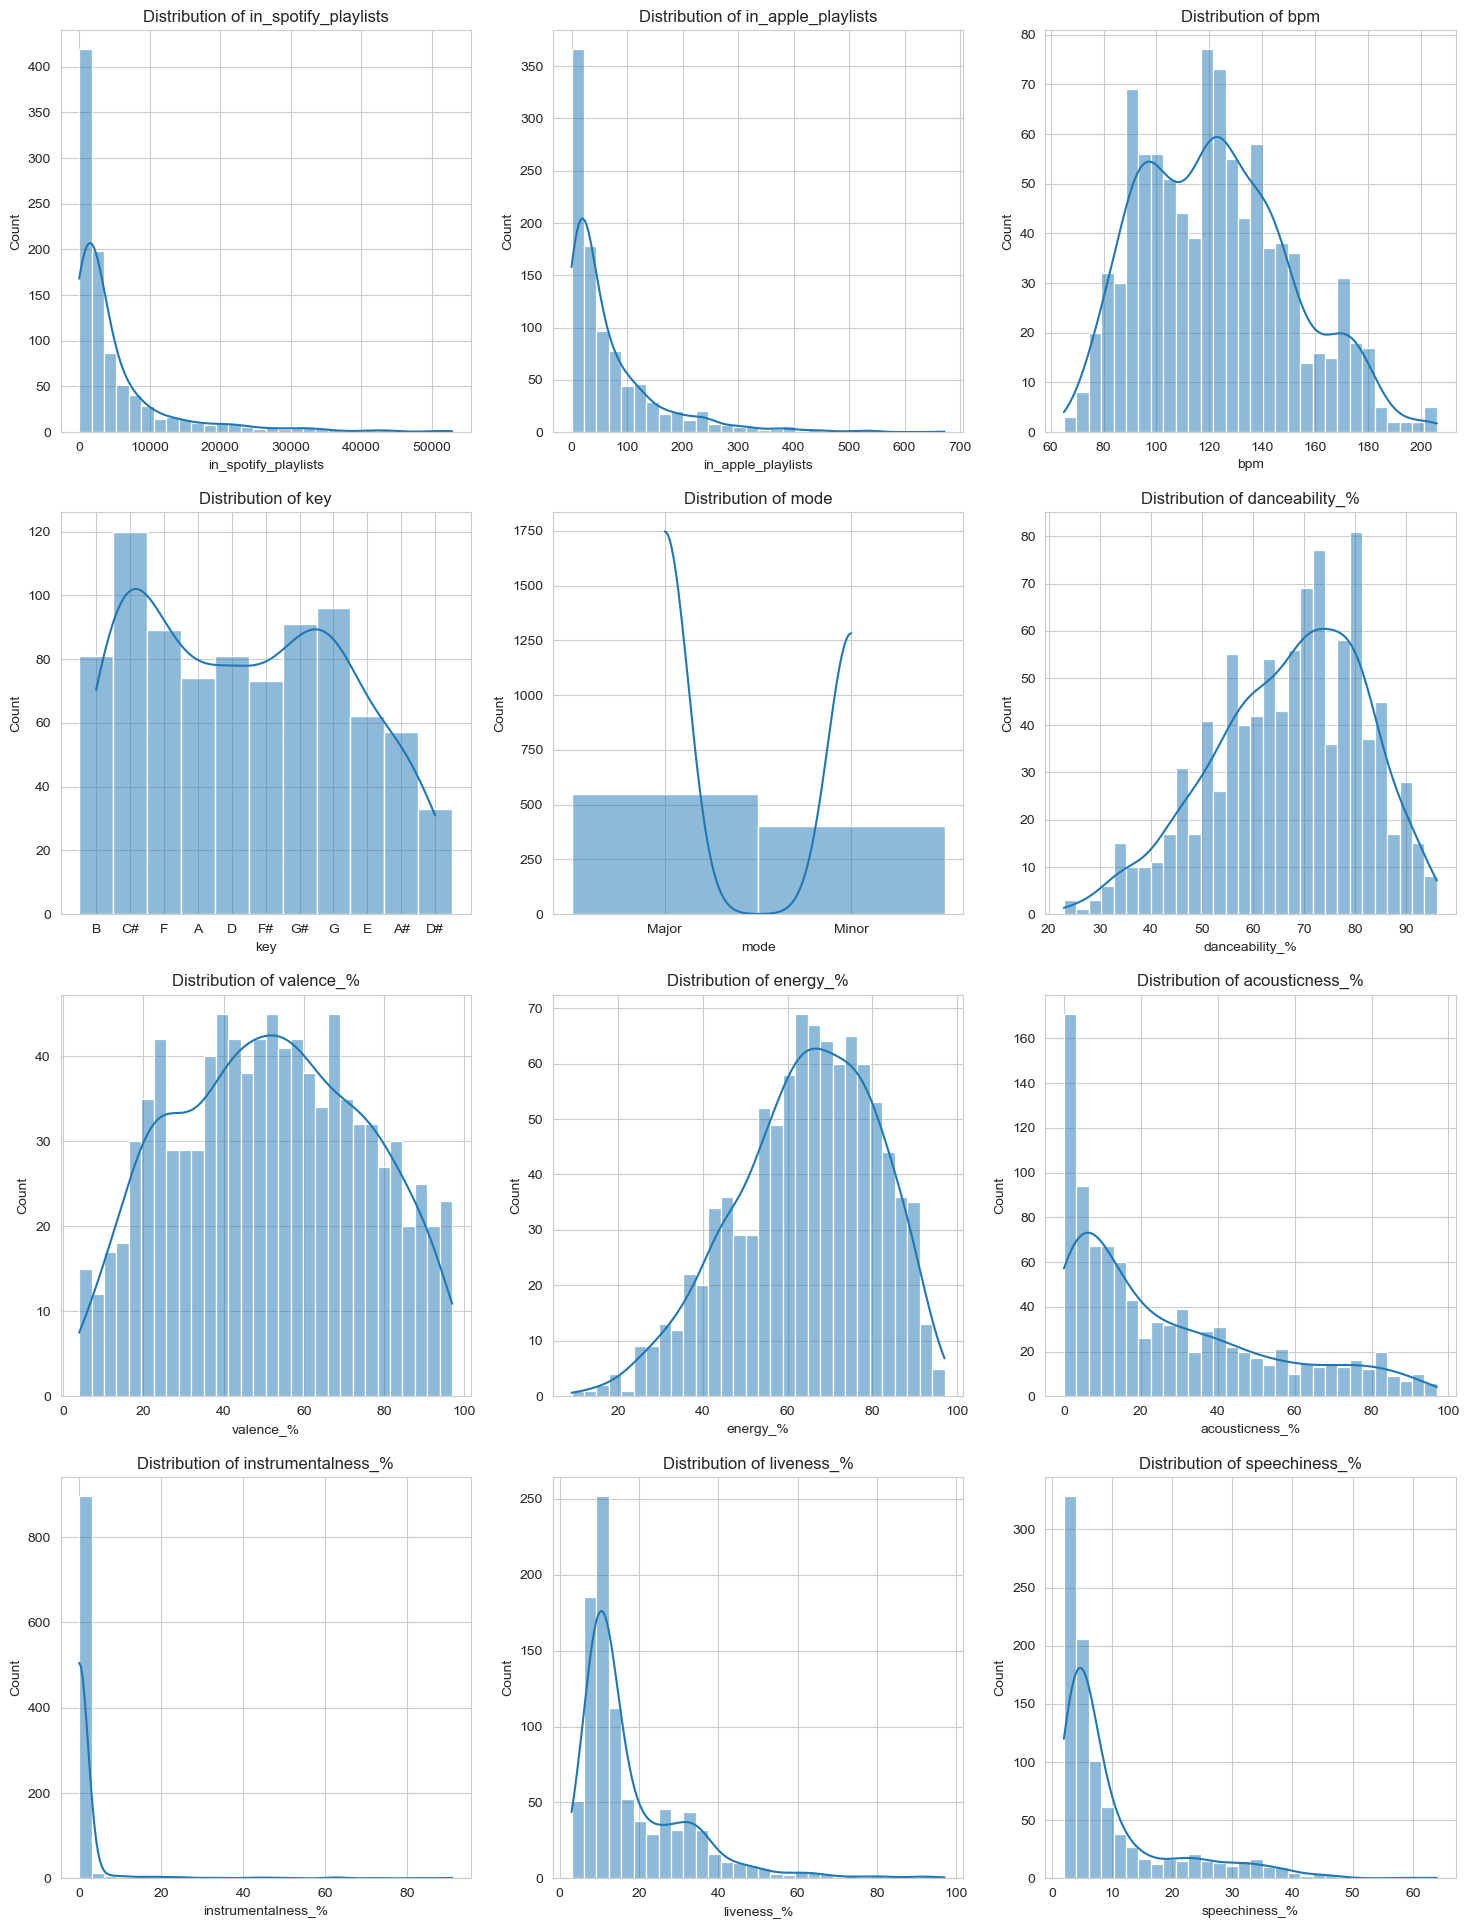

In [12]:
# List of key numeric features for Distribution analysis
exclude_non_num = [0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13]
key_list = [features_list[i] for i in range(len(features_list)) if i not in exclude_non_num]

# Plotting the distribution of key numeric features
plt.figure(figsize = (18, 24))

for i, feature in enumerate(key_list, 1):
    plt.subplot(4, 3, i)
    sns.histplot(spotify_data[feature], bins = 30, kde = True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout

plt.show()

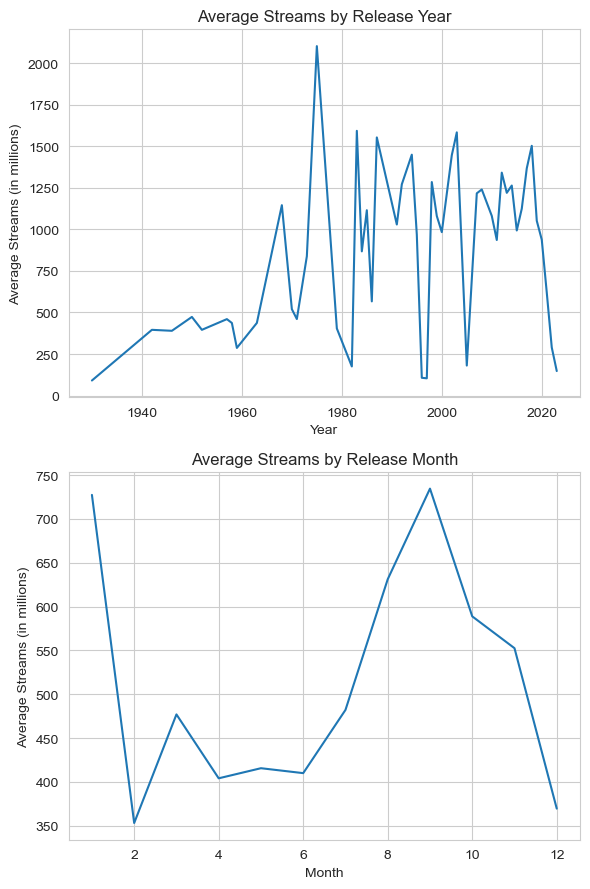

In [13]:
# Plotting the distribution of key temporal features
plt.figure(figsize = (6, 9))

# Streams by release year
plt.subplot(2, 1, 1)
yearly_streams = spotify_data.groupby('released_year')['streams'].mean()
sns.lineplot(x = yearly_streams.index, y = yearly_streams.values)
tick_loc = [0, 0.25e9, 0.5e9, 0.75e9, 1.0e9, 1.25e9, 1.5e9, 1.75e9, 2.0e9]
tick_label = ['0', '250', '500', '750', '1000', '1250', '1500', '1750', '2000']
plt.yticks(tick_loc, tick_label)
plt.title('Average Streams by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Streams (in millions)')

# Streams by release month
plt.subplot(2, 1, 2)
monthly_streams = spotify_data.groupby('released_month')['streams'].mean()
sns.lineplot(x = monthly_streams.index, y = monthly_streams.values)
tick_loc = [3.5e8, 4.0e8, 4.5e8, 5.0e8, 5.5e8, 6.0e8, 6.5e8, 7.0e8, 7.5e8]
tick_label = ['350', '400', '450', '500', '550', '600', '650', '700', '750']
plt.yticks(tick_loc, tick_label)
plt.title('Average Streams by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Streams (in millions)')

plt.tight_layout()
plt.show()

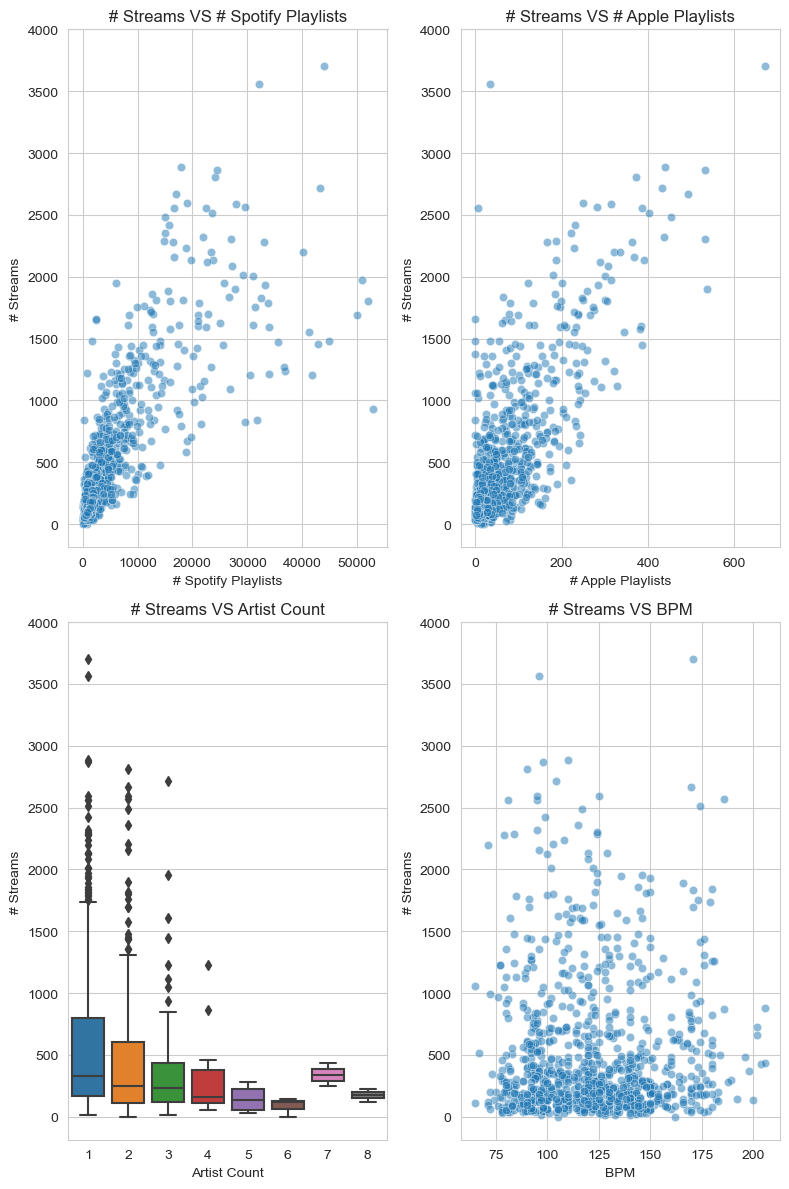

In [14]:
# Plotting the feature relationship between number of streams and other key features
plt.figure(figsize = (8, 12))

# Streams VS Spotify Playlists
plt.subplot(2, 2, 1)
sns.scatterplot(x = spotify_data['in_spotify_playlists'], y = spotify_data['streams'], alpha = 0.5)
tick_loc = [0, 0.5e9, 1.0e9, 1.5e9, 2.0e9, 2.5e9, 3.0e9, 3.5e9, 4.0e9]
tick_label = ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
plt.yticks(tick_loc, tick_label)
plt.title('# Streams VS # Spotify Playlists')
plt.xlabel('# Spotify Playlists')
plt.ylabel('# Streams')

# Streams VS Apple Playlists
plt.subplot(2, 2, 2)
sns.scatterplot(x = spotify_data['in_apple_playlists'], y = spotify_data['streams'], alpha = 0.5)
tick_loc = [0, 0.5e9, 1.0e9, 1.5e9, 2.0e9, 2.5e9, 3.0e9, 3.5e9, 4.0e9]
tick_label = ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
plt.yticks(tick_loc, tick_label)
plt.title('# Streams VS # Apple Playlists')
plt.xlabel('# Apple Playlists')
plt.ylabel('# Streams')

# Streams VS Artist Count
plt.subplot(2, 2, 3)
sns.boxplot(x = spotify_data['artist_count'], y = spotify_data['streams'])
tick_loc = [0, 0.5e9, 1.0e9, 1.5e9, 2.0e9, 2.5e9, 3.0e9, 3.5e9, 4.0e9]
tick_label = ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
plt.yticks(tick_loc, tick_label)
plt.title('# Streams VS Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('# Streams')

# Streams VS BMP
plt.subplot(2, 2, 4)
sns.scatterplot(x = spotify_data['bpm'], y = spotify_data['streams'], alpha = 0.5)
tick_loc = [0, 0.5e9, 1.0e9, 1.5e9, 2.0e9, 2.5e9, 3.0e9, 3.5e9, 4.0e9]
tick_label = ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
plt.yticks(tick_loc, tick_label)
plt.title('# Streams VS BPM')
plt.xlabel('BPM')
plt.ylabel('# Streams')

plt.tight_layout()
plt.show()

In [15]:
# Features and Target
X = spotify_data.drop(columns = 'streams')
y = spotify_data['streams']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include = ['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()

# Create transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [16]:
# Create and evaluating the regression model
model = Pipeline(steps = [('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('The Mean Absolute Error is: ', mae)
print('The Mean Squared Error is: ', mse)
print('The R-squared is: ', r2)

The Mean Absolute Error is:  208352167.6043396
The Mean Squared Error is:  1.0299604929663296e+17
The R-squared is:  0.6900356976122708


In [17]:
# Create and evaluate the Random Forest model
rf_model = Pipeline(steps = [('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators = 100, random_state = 1))])

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluation metrics
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print('The Mean Absolute Error is: ', rf_mae)
print('The Mean Squared Error is: ', rf_mse)
print('The R-squared is: ', rf_r2)

The Mean Absolute Error is:  145112944.91198954
The Mean Squared Error is:  6.049979663480017e+16
The R-squared is:  0.8179272177275797


In [18]:
# Preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert preprocessed data to dense arrays
X_train_dense = X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed
X_test_dense = X_test_processed.toarray() if hasattr(X_test_processed, 'toarray') else X_test_processed

# Neural Network architecture
input_dim = X_train_processed.shape[1]  # Number of features

model = keras.Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dense(64, activation='relu'),
    Dense(1)  # Single output neuron for regression
])

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
history = model.fit(X_train_dense, y_train, epochs = 100, batch_size = 32, validation_data = (X_test_dense, y_test))

# Predictions
y_nn_pred = model.predict(X_test_processed)

# Evaluation metrics
nn_mae = mean_absolute_error(y_test, y_nn_pred)
nn_mse = mean_squared_error(y_test, y_nn_pred)
nn_r2 = r2_score(y_test, y_nn_pred)

print('The Mean Absolute Error is: ', nn_mae)
print('The Mean Squared Error is: ', nn_mse)
print('The R-squared is: ', nn_r2)


Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 579461250816147456.0000 - val_loss: 608695753170223104.0000
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 579461182096670720.0000 - val_loss: 608695753170223104.0000
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 579461319535624192.0000 - val_loss: 608695684450746368.0000
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 579461182096670720.0000 - val_loss: 608695615731269632.0000
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 579461044657717248.0000 - val_loss: 608695547011792896.0000
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 579460907218763776.0000 - val_loss: 608695340853362688.0000
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 579460701060333568.0000 - val_loss: 608695065975455744.0000
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - 

In [19]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.named_steps['regressor'].feature_importances_

# Get feature names after one-hot encoding
ohe_feature_names = (rf_model.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names_out(input_features = categorical_features))

all_feature_names = numeric_features + list(ohe_feature_names)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by = 'Importance', ascending = False)

# Display top 10 features based on importance
top_features = feature_importance_df.head(10)

top_features

,Feature,Importance
4,in_spotify_playlists,0.745870
6,in_apple_playlists,0.055346
1,released_year,0.053348
5,in_spotify_charts,0.017594
12,energy_%,0.009929
13,acousticness_%,0.009402
10,danceability_%,0.009154
11,valence_%,0.009002
7,in_apple_charts,0.007545
15,liveness_%,0.006719


In [20]:
# Sample song features for prediction
sample_song = {
    'track_name': ['Sample Song'],
    'artist(s)_name': ['Sample Artist'],
    'artist_count': [1],
    'released_year': [2023],
    'released_month': [5],
    'released_day': [15],
    'in_spotify_playlists': [500],
    'in_spotify_charts': [1],
    'in_apple_playlists': [400],
    'in_apple_charts': [1],
    'playlist_adds': [1200],
    'bpm': [100],
    'key': ['C'],
    'mode': ['Major'],
    'danceability_%': [0.75],
    'valence_%': [0.6],
    'energy_%': [0.7],
    'acousticness_%': [0.1],
    'instrumentalness_%': [0.05],
    'liveness_%': [0.1],
    'speechiness_%': [0.05]
}

sample_data = pd.DataFrame(sample_song)

# Prediction using the trained Random Forest model
predicted_streams = rf_model.predict(sample_data)

print(f"Predicted Streams: {predicted_streams[0]}")


KeyError: "['in_deezer_charts'] not in index"